In [1]:
from IPython.core.display import display, HTML

# Ustawienie szerokości na 50%
display(HTML("<style>.container { width:50% !important; }</style>"))

C:\Users\Przemek\AppData\Local\Temp\ipykernel_2240\1255031449.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

import tensorflow as tf

import matplotlib.pyplot as plt

C:\Users\Przemek\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Importing IMDB dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Converting data to vectors

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [5]:
# Converting training and test data to vector

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# Building a neural network model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# Compiling our model

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Splitting the training data into a validation set and a training set

x_val = x_train[:10000]
x_train_partial = x_train[10000:]

y_val = y_train[:10000]
y_train_partial = y_train[10000:]

In [9]:
# Model traning

history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5385 - accuracy: 0.7801 - val_loss: 0.4146 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3300 - accuracy: 0.8981 - val_loss: 0.3160 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2364 - accuracy: 0.9257 - val_loss: 0.2936 - val_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1861 - accuracy: 0.9381 - val_loss: 0.2820 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1490 - accuracy: 0.9527 - val_loss: 0.2760 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1241 - accuracy: 0.9603 - val_loss: 0.2914 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1038 - accuracy: 0.9679 - val_loss: 0.3031 - val_accuracy: 0.8845
Epoch 8/20
30

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

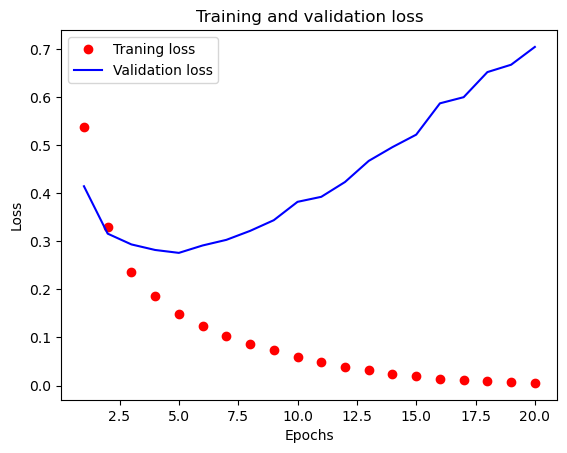

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

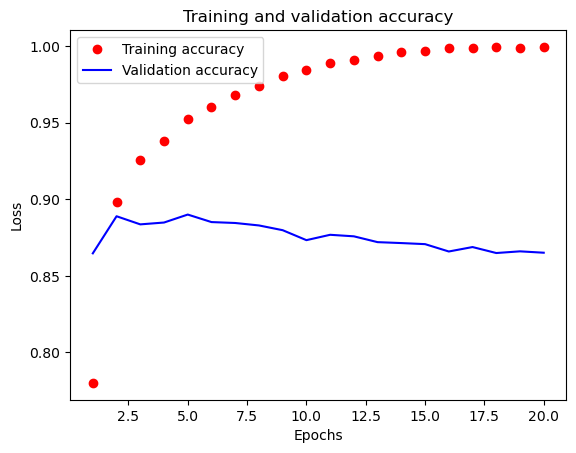

In [12]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

In [14]:
# Building a new neural network model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
# Compiling our model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [16]:
# Model traning

history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=20,
                    batch_size=512,
                    callbacks=[callback],
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5258 - accuracy: 0.7532 - val_loss: 0.3239 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2632 - accuracy: 0.8977 - val_loss: 0.2871 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1714 - accuracy: 0.9383 - val_loss: 0.2843 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1144 - accuracy: 0.9630 - val_loss: 0.3197 - val_accuracy: 0.8839


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

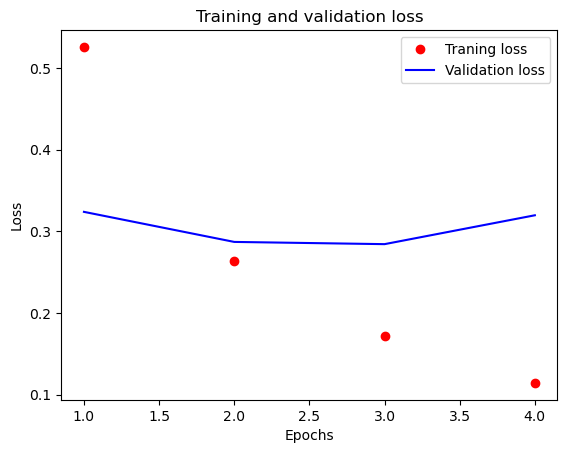

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

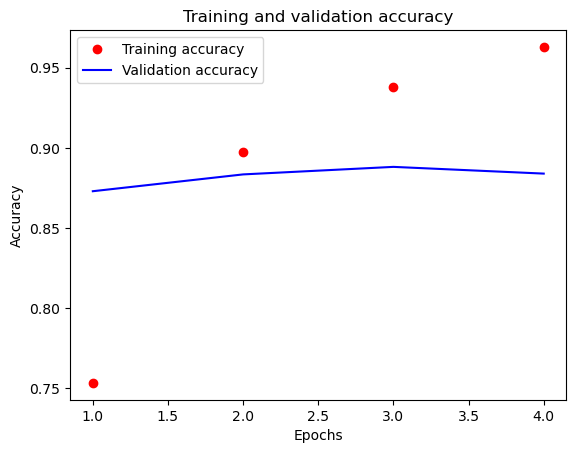

In [19]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
# Average accuracy on the validation set

print(f'Average accuracy on the validation set: {round(np.mean(history.history["val_accuracy"]),4)}')


Average accuracy on the validation set: 0.8821


In [21]:
# Evaluating the model

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {round(score[1],4)}')

Accuracy: 0.8739
